# Load data 

In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from parse_logs.parse_base import LogDir
from parse_logs.extract_experiment_result import parse_experiment_result
from parse_logs.parse_coordinator_logs import read_design

from parse_logs.parse_coordinator_logs import get_flat_design
from flatten_json import flatten

sns.set(rc={"figure.figsize":(16, 8)})
# parser.root_data_path = '../tests/data'
#trial_run_objects = parser.get_trial_runs(
#    exp_run_code='experiment_2021_04_01_16_20_00_run_1')

LogDir.base_data_path = '../data'
trial_run_objects = parse_experiment_result(exec_code='experiment_2021_07_29_15_33_17_run_1')

# load trials run to dict (it can take a while)
# sort and instantiate a dataframe
trial_run_dicts = [trial_run.to_dict() for trial_run in trial_run_objects]
# trial_run_dicts

ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"
ignoring "trial.log, wrong name format"


In [2]:
trial_run_dicts.sort( key=lambda tr: tr['exec_group']+tr['code'])
# trial_run_dicts

trial_run_df = pd.DataFrame.from_records(trial_run_dicts)
trial_run_df

,exec_group,scenario_id,code,treatment,executor,ttc,failure_time,end_state,end_battery_level,total_time_wall_clock,last_battery_levels,has_failure
0,les-01,1,aaaaab,None,turtlebot4,NaN,155.28,low-battery,0.0496,None,{'turtlebot4': 0.0496},True
1,les-01,1,aaaaap,None,turtlebot2,421.43,NaN,success,0.4330,None,{'turtlebot2': 0.433},False
2,les-01,2,aaaabb,None,turtlebot6,NaN,101.03,no-skill,0.4792,None,{'turtlebot6': 0.4792},True
3,les-01,2,aaaabp,None,turtlebot2,394.38,NaN,success,0.4405,None,{'turtlebot2': 0.44049999999999995},False
4,les-01,3,aaaacb,None,turtlebot6,NaN,69.28,no-skill,0.4995,None,{'turtlebot6': 0.49950000000000006},True
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,les-08,79,acccap,None,turtlebot3,335.07,NaN,success,0.5920,None,{'turtlebot3': 0.5920000000000001},False
1292,les-08,80,acccbb,None,turtlebot3,430.25,NaN,success,0.5560,None,{'turtlebot3': 0.556},False
1293,les-08,80,acccbp,None,turtlebot6,211.20,NaN,success,0.8140,None,{'turtlebot6': 0.8140000000000001},False
1294,les-08,81,accccb,None,turtlebot2,222.02,NaN,success,0.4525,None,{'turtlebot2': 0.4525},False


In [3]:
exp_design = get_flat_design(exec_code='experiment_2021_07_29_15_33_17_run_1')
td_df = pd.DataFrame.from_records(exp_design)
td_df = td_df.set_index('code')

td_df

,scenario_id,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
code,,,,,,,
aaaaab,1,a,a,a,a,a,baseline
aaaaap,1,a,a,a,a,a,planned
aaaabb,2,a,a,a,b,a,baseline
aaaabp,2,a,a,a,b,a,planned
aaaacb,3,a,a,a,c,a,baseline
...,...,...,...,...,...,...,...
acccap,79,a,c,c,a,c,planned
acccbb,80,a,c,c,b,c,baseline
acccbp,80,a,c,c,b,c,planned


In [4]:
trial_run_df  = trial_run_df.drop(['treatment'], axis=1).join(td_df.drop(['scenario_id'], axis=1), on='code', lsuffix='_left', rsuffix='_right')
trial_run_df

,exec_group,scenario_id,code,executor,ttc,failure_time,end_state,end_battery_level,total_time_wall_clock,last_battery_levels,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
0,les-01,1,aaaaab,turtlebot4,NaN,155.28,low-battery,0.0496,None,{'turtlebot4': 0.0496},True,a,a,a,a,a,baseline
1,les-01,1,aaaaap,turtlebot2,421.43,NaN,success,0.4330,None,{'turtlebot2': 0.433},False,a,a,a,a,a,planned
2,les-01,2,aaaabb,turtlebot6,NaN,101.03,no-skill,0.4792,None,{'turtlebot6': 0.4792},True,a,a,a,b,a,baseline
3,les-01,2,aaaabp,turtlebot2,394.38,NaN,success,0.4405,None,{'turtlebot2': 0.44049999999999995},False,a,a,a,b,a,planned
4,les-01,3,aaaacb,turtlebot6,NaN,69.28,no-skill,0.4995,None,{'turtlebot6': 0.49950000000000006},True,a,a,a,c,a,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,les-08,79,acccap,turtlebot3,335.07,NaN,success,0.5920,None,{'turtlebot3': 0.5920000000000001},False,a,c,c,a,c,planned
1292,les-08,80,acccbb,turtlebot3,430.25,NaN,success,0.5560,None,{'turtlebot3': 0.556},False,a,c,c,b,c,baseline
1293,les-08,80,acccbp,turtlebot6,211.20,NaN,success,0.8140,None,{'turtlebot6': 0.8140000000000001},False,a,c,c,b,c,planned
1294,les-08,81,accccb,turtlebot2,222.02,NaN,success,0.4525,None,{'turtlebot2': 0.4525},False,a,c,c,c,c,baseline


## Baseline

In [5]:
baseline_df = trial_run_df[trial_run_df.treatment == 'baseline']
baseline_df

,exec_group,scenario_id,code,executor,ttc,failure_time,end_state,end_battery_level,total_time_wall_clock,last_battery_levels,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
0,les-01,1,aaaaab,turtlebot4,NaN,155.28,low-battery,0.0496,None,{'turtlebot4': 0.0496},True,a,a,a,a,a,baseline
2,les-01,2,aaaabb,turtlebot6,NaN,101.03,no-skill,0.4792,None,{'turtlebot6': 0.4792},True,a,a,a,b,a,baseline
4,les-01,3,aaaacb,turtlebot6,NaN,69.28,no-skill,0.4995,None,{'turtlebot6': 0.49950000000000006},True,a,a,a,c,a,baseline
6,les-01,4,aaabab,turtlebot5,490.72,NaN,success,0.5862,None,{'turtlebot5': 0.5861999999999999},False,a,a,a,a,b,baseline
8,les-01,5,aaabbb,turtlebot6,208.30,NaN,success,0.3525,None,{'turtlebot6': 0.3525},False,a,a,a,b,b,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,les-08,77,accbbb,turtlebot1,NaN,137.78,no-skill,0.2187,None,{'turtlebot1': 0.2187},True,a,c,c,b,b,baseline
1288,les-08,78,accbcb,None,NaN,15.15,no-skill,NaN,None,None,True,a,c,c,c,b,baseline
1290,les-08,79,acccab,turtlebot3,406.70,NaN,success,0.5680,None,{'turtlebot3': 0.568},False,a,c,c,a,c,baseline
1292,les-08,80,acccbb,turtlebot3,430.25,NaN,success,0.5560,None,{'turtlebot3': 0.556},False,a,c,c,b,c,baseline


# Planned

In [6]:
planned_df = trial_run_df[trial_run_df.treatment == 'planned']
planned_df

,exec_group,scenario_id,code,executor,ttc,failure_time,end_state,end_battery_level,total_time_wall_clock,last_battery_levels,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
1,les-01,1,aaaaap,turtlebot2,421.43,NaN,success,0.4330,None,{'turtlebot2': 0.433},False,a,a,a,a,a,planned
3,les-01,2,aaaabp,turtlebot2,394.38,NaN,success,0.4405,None,{'turtlebot2': 0.44049999999999995},False,a,a,a,b,a,planned
5,les-01,3,aaaacp,turtlebot2,213.23,NaN,success,0.5380,None,{'turtlebot2': 0.5379999999999999},False,a,a,a,c,a,planned
7,les-01,4,aaabap,turtlebot6,331.75,NaN,success,0.3210,None,{'turtlebot6': 0.321},False,a,a,a,a,b,planned
9,les-01,5,aaabbp,turtlebot6,204.15,NaN,success,0.4050,None,{'turtlebot6': 0.405},False,a,a,a,b,b,planned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,les-08,77,accbbp,turtlebot6,209.98,NaN,success,0.8140,None,{'turtlebot6': 0.8140000000000001},False,a,c,c,b,b,planned
1289,les-08,78,accbcp,turtlebot6,185.38,NaN,success,0.8295,None,{'turtlebot6': 0.8295},False,a,c,c,c,b,planned
1291,les-08,79,acccap,turtlebot3,335.07,NaN,success,0.5920,None,{'turtlebot3': 0.5920000000000001},False,a,c,c,a,c,planned
1293,les-08,80,acccbp,turtlebot6,211.20,NaN,success,0.8140,None,{'turtlebot6': 0.8140000000000001},False,a,c,c,b,c,planned


In [7]:
# Average TCC

planned_ttc_avg = planned_df['ttc'].mean()
planned_ttc_avg

268.49532258064517

In [8]:
# by machine (no trial run dummy aparece o mesmo porque a pasta foi copiada)
(planned_df[planned_df.exec_group == 'les-01']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-03']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-04']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-05']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-06']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-07']['ttc'].mean(),
planned_df[planned_df.exec_group == 'les-08']['ttc'].mean())

(279.3969014084508,
 263.37656716417905,
 270.1132857142858,
 267.57041095890406,
 270.819696969697,
 265.1230882352941,
 270.3883333333334)

In [9]:
# comparing factors (no dummy os fatores não foram distinguidos, porque teria que renomear os arquivos)
[(planned_df[planned_df.factors_battery_charge == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_charge == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_battery_discharge_rate == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_location == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_location == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_location == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_battery_discharge_rate == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_battery_discharge_rate == 'c']['ttc'].mean()),

(planned_df[planned_df.factors_skills == 'a']['ttc'].mean(),
 planned_df[planned_df.factors_skills == 'b']['ttc'].mean(),
 planned_df[planned_df.factors_skills == 'c']['ttc'].mean())]

[(278.55255434782583, 262.8032258064516, 264.2836170212765),
 (276.15512820512794, 278.0903092783505, 248.64272189349106),
 (413.89019999999994, 239.56568627450972, 190.5169607843137),
 (276.15512820512794, 278.0903092783505, 248.64272189349106),
 (306.4339226519335, 245.90486772486767, 254.6799468085105)]

# Statistics

## Number of each event
i.e. how many times did the simulation achieve each status

In [10]:
by_end_state = trial_run_df.groupby(['end_state', 'treatment'])['end_state']
by_end_state.count()
# planned_by_end_state_df = planned_df.groupby('end_state')['end_state'].count()
# pd.merge(baseline_by_end_state_df, planned_by_end_state_df, on='end_state')

end_state    treatment
low-battery  baseline     100
             planned       35
no-skill     baseline     175
success      baseline     354
             planned      558
Name: end_state, dtype: int64

In [11]:
trial_run_df.groupby(['scenario_id', 'code', 'treatment'])['end_state'].value_counts()

scenario_id  code    treatment  end_state  
1            aaaaab  baseline   low-battery    7
             aaaaap  planned    success        8
2            aaaabb  baseline   no-skill       8
             aaaabp  planned    success        7
3            aaaacb  baseline   no-skill       8
                                              ..
79           acccap  planned    success        6
80           acccbb  baseline   success        8
             acccbp  planned    success        7
81           accccb  baseline   success        8
             accccp  planned    success        6
Name: end_state, Length: 184, dtype: int64

## Planned

array([<AxesSubplot:title={'center':'low-battery'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'success'}, xlabel='scenario_id'>],
      dtype=object)

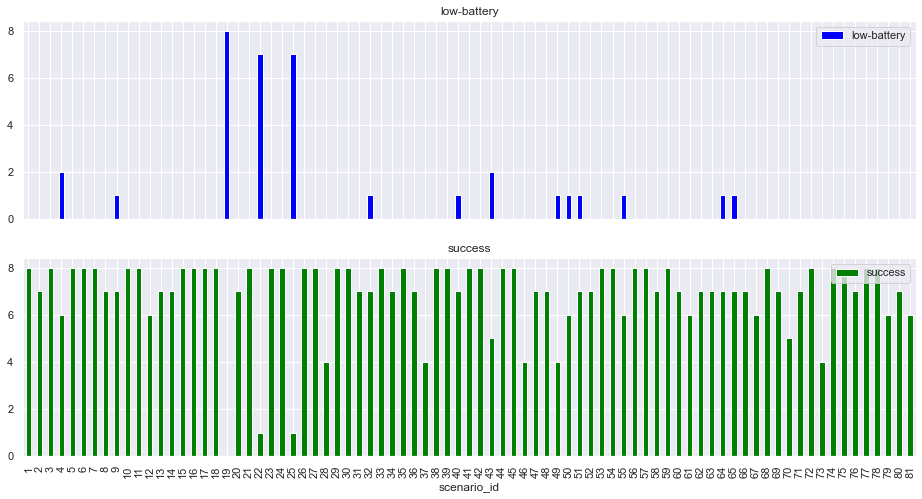

In [12]:
planned_df.groupby("scenario_id")["end_state"].value_counts().unstack().plot.bar(subplots=True, legend=True, 
                                                                              color={"success": "green", 
                                                                                     "failure-bt": "orange",
                                                                                     "low-battery": "blue",
                                                                                     "timeout-wall": "purple", 
                                                                                     "timeout-sim": "red" })

## Baseline

array([<AxesSubplot:title={'center':'low-battery'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'no-skill'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'success'}, xlabel='scenario_id'>],
      dtype=object)

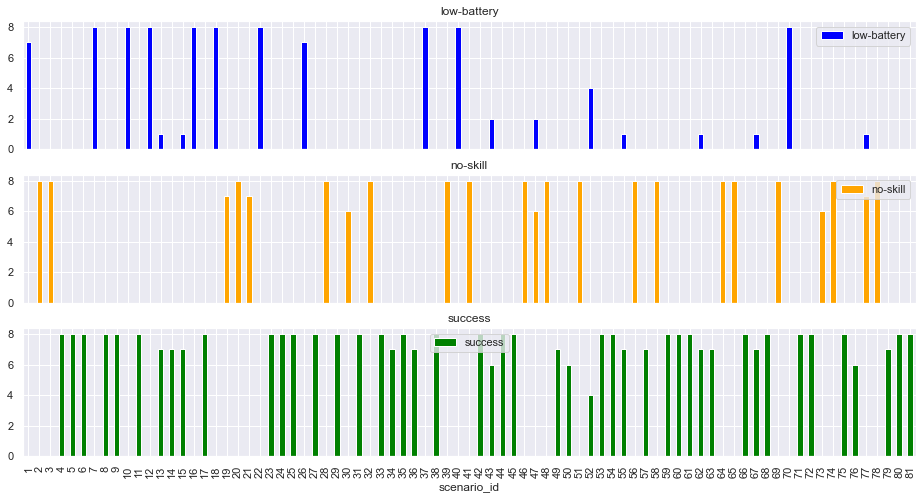

In [13]:
baseline_df.groupby("scenario_id")["end_state"].value_counts().unstack().plot.bar(subplots=True, legend=True,
                                                                               color={"success": "green", 
                                                                                      "no-skill": "orange", 
                                                                                      "timeout-sim": "red",
                                                                                      "low-battery": "blue",
                                                                                      "timeout-wall": "purple"})

## Time to Conclusion

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

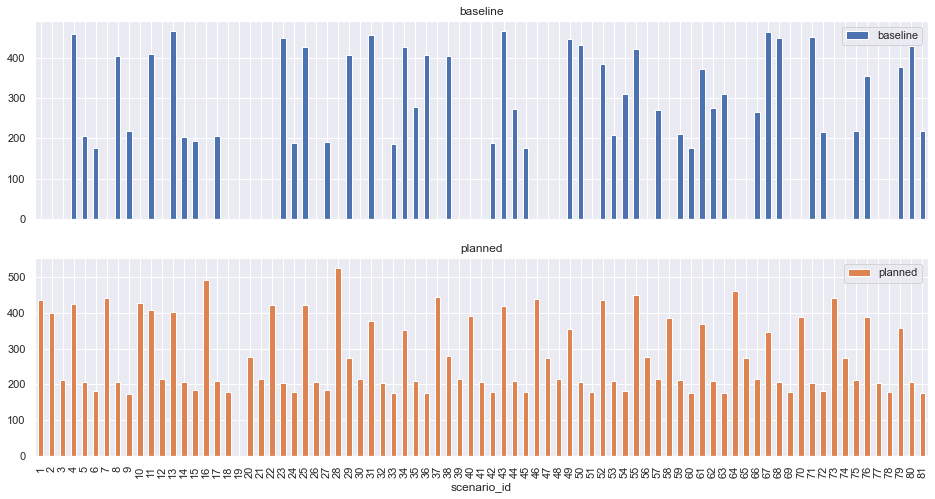

In [14]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

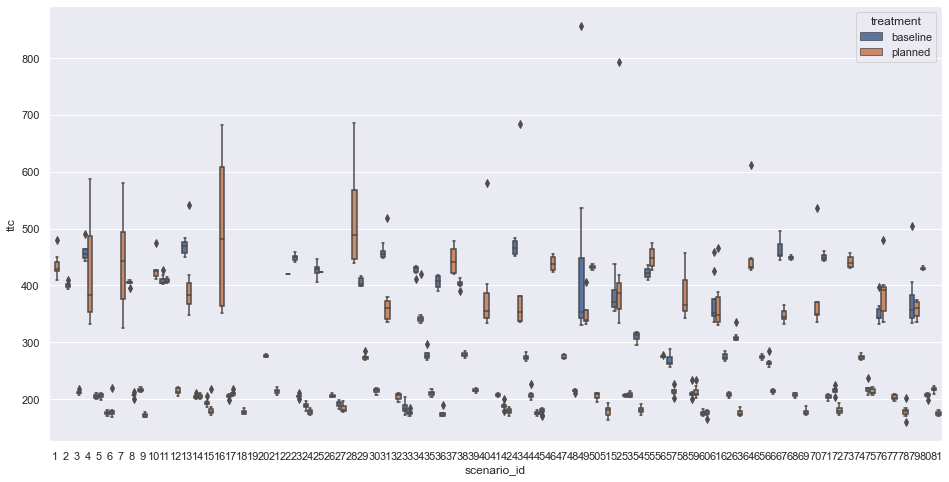

In [15]:
sns.boxplot(x="scenario_id", y="ttc", hue="treatment", data=trial_run_df)

<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

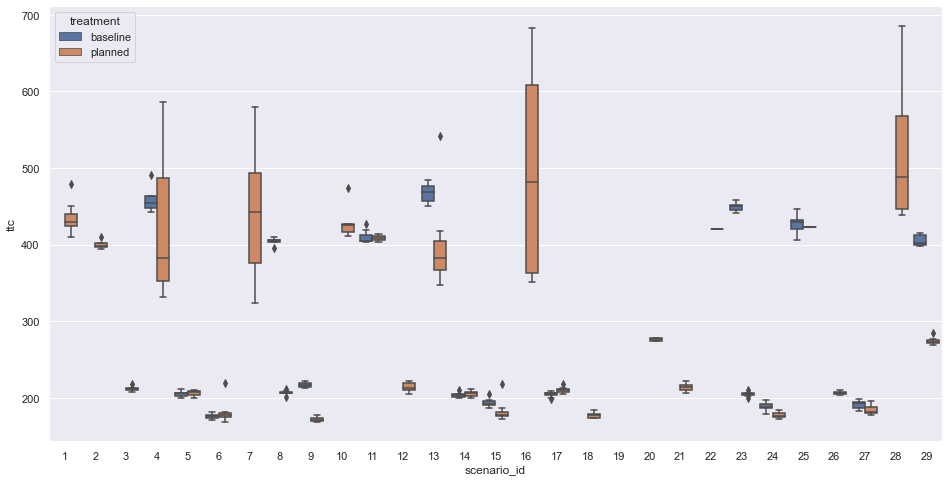

In [16]:
sns.boxplot(x="scenario_id", y="ttc", hue="treatment", data=trial_run_df[trial_run_df.scenario_id < 30])

<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

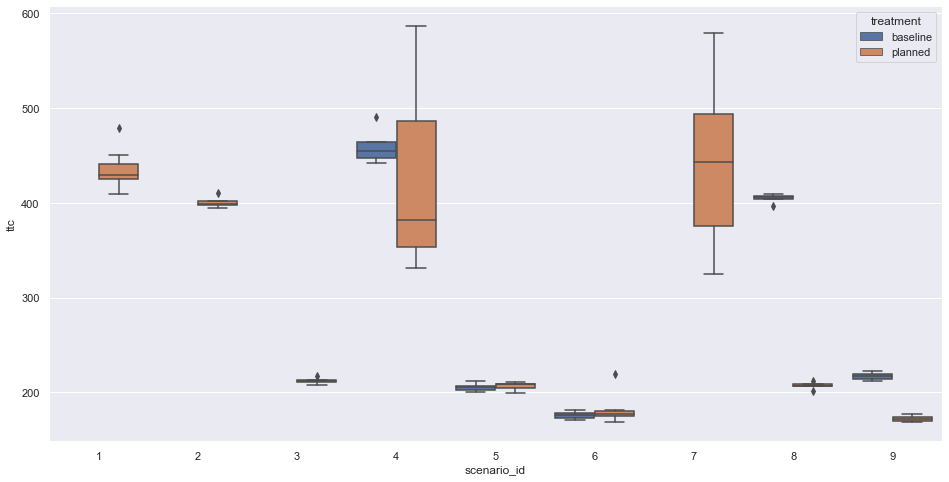

In [17]:
sns.boxplot(x="scenario_id", y="ttc", hue="treatment", data=trial_run_df[trial_run_df.scenario_id < 10])

In [18]:
trial_run_df.groupby(["scenario_id", "treatment", "executor"])['end_state'].value_counts()

scenario_id  treatment  executor    end_state  
1            baseline   turtlebot4  low-battery    7
             planned    turtlebot2  success        7
2            baseline   turtlebot6  no-skill       8
             planned    turtlebot2  success        7
3            baseline   turtlebot6  no-skill       8
                                                  ..
79           planned    turtlebot3  success        6
80           baseline   turtlebot3  success        8
             planned    turtlebot6  success        7
81           baseline   turtlebot2  success        8
             planned    turtlebot6  success        6
Name: end_state, Length: 178, dtype: int64

## STD

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

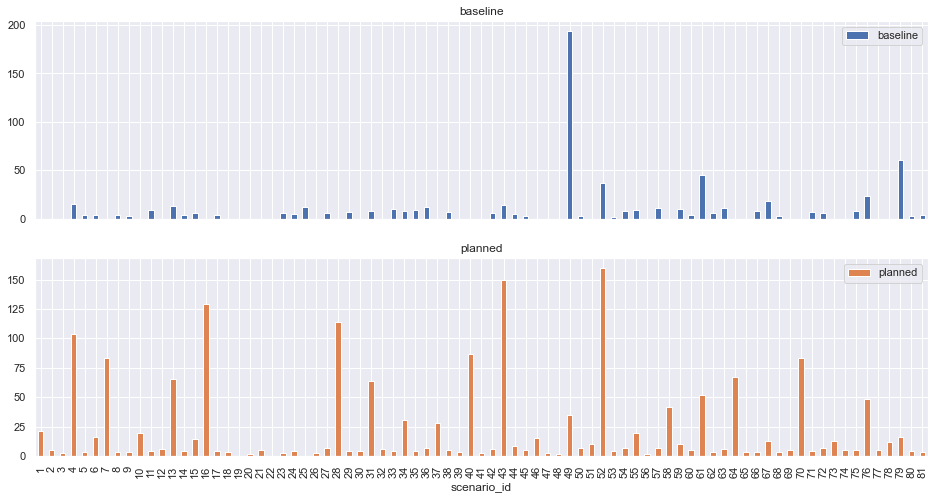

In [19]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack().plot.bar(subplots=True, legend=True)

<AxesSubplot:xlabel='scenario_id'>

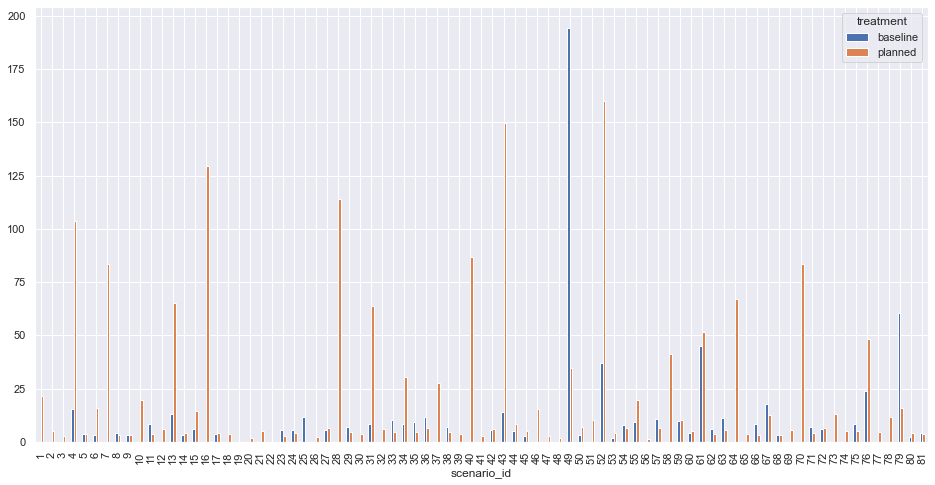

In [20]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack().plot.bar(legend=True)

In [21]:
trial_run_df.groupby(["scenario_id", "treatment"])["ttc"].std().unstack()

treatment,baseline,planned
scenario_id,,
1,NaN,21.373245
2,NaN,5.175854
3,NaN,2.778607
4,15.534089,103.473376
5,3.700135,3.793445
...,...,...
77,NaN,4.755962
78,NaN,11.818658
79,60.341103,15.790224


# Plots

## Successes per trial

In [22]:
successes = trial_run_df[trial_run_df.end_state == "success"]
counts = successes.groupby(["scenario_id", "treatment"])["end_state"].count().to_frame().reset_index()

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

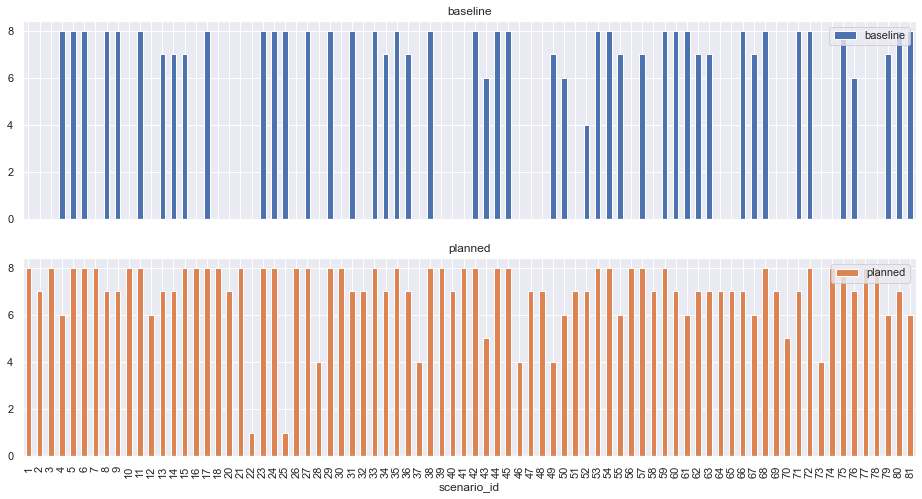

In [23]:
successes.groupby(["scenario_id", "treatment"])["end_state"].count().unstack().plot.bar(subplots=True, legend=True)

## 10 first successes boxplot

In [24]:
both_trials_succcess = successes.groupby(["scenario_id", "treatment"])["end_state"].count().unstack()
both_trials_succcess = both_trials_succcess[(both_trials_succcess.baseline > 0) & (both_trials_succcess.planned > 0)].reset_index()
both_trials_succcess = trial_run_df[trial_run_df['scenario_id'].isin(both_trials_succcess.scenario_id)]
both_trials_succcess

,exec_group,scenario_id,code,executor,ttc,failure_time,end_state,end_battery_level,total_time_wall_clock,last_battery_levels,has_failure,factors_avg_speed,factors_battery_charge,factors_battery_discharge_rate,factors_location,factors_skills,treatment
6,les-01,4,aaabab,turtlebot5,490.72,NaN,success,0.5862,None,{'turtlebot5': 0.5861999999999999},False,a,a,a,a,b,baseline
7,les-01,4,aaabap,turtlebot6,331.75,NaN,success,0.3210,None,{'turtlebot6': 0.321},False,a,a,a,a,b,planned
8,les-01,5,aaabbb,turtlebot6,208.30,NaN,success,0.3525,None,{'turtlebot6': 0.3525},False,a,a,a,b,b,baseline
9,les-01,5,aaabbp,turtlebot6,204.15,NaN,success,0.4050,None,{'turtlebot6': 0.405},False,a,a,a,b,b,planned
10,les-01,6,aaabcb,turtlebot6,176.85,NaN,success,0.4260,None,{'turtlebot6': 0.426},False,a,a,a,c,b,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,les-08,79,acccap,turtlebot3,335.07,NaN,success,0.5920,None,{'turtlebot3': 0.5920000000000001},False,a,c,c,a,c,planned
1292,les-08,80,acccbb,turtlebot3,430.25,NaN,success,0.5560,None,{'turtlebot3': 0.556},False,a,c,c,b,c,baseline
1293,les-08,80,acccbp,turtlebot6,211.20,NaN,success,0.8140,None,{'turtlebot6': 0.8140000000000001},False,a,c,c,b,c,planned
1294,les-08,81,accccb,turtlebot2,222.02,NaN,success,0.4525,None,{'turtlebot2': 0.4525},False,a,c,c,c,c,baseline


<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

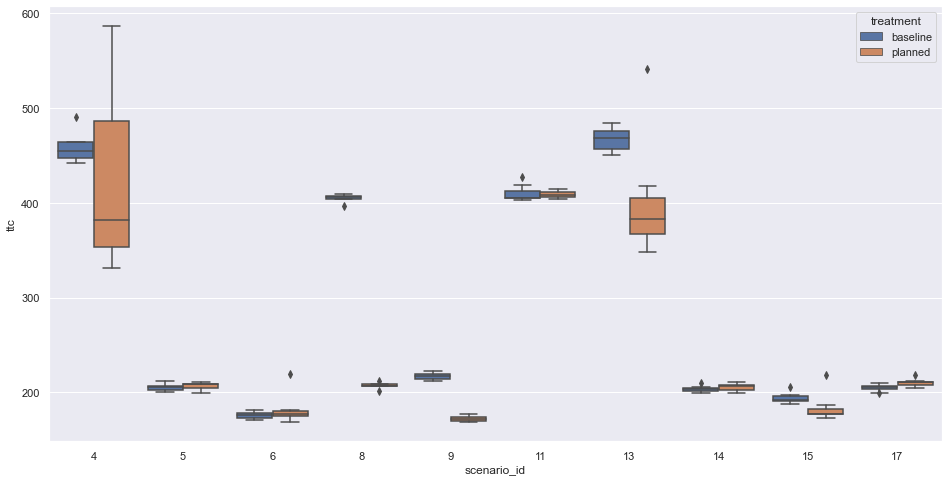

In [25]:
sns.boxplot(x="scenario_id", y="ttc", hue="treatment", data=both_trials_succcess[both_trials_succcess.scenario_id < 20])

### Average time to reach target

array([<AxesSubplot:title={'center':'baseline'}, xlabel='scenario_id'>,
       <AxesSubplot:title={'center':'planned'}, xlabel='scenario_id'>],
      dtype=object)

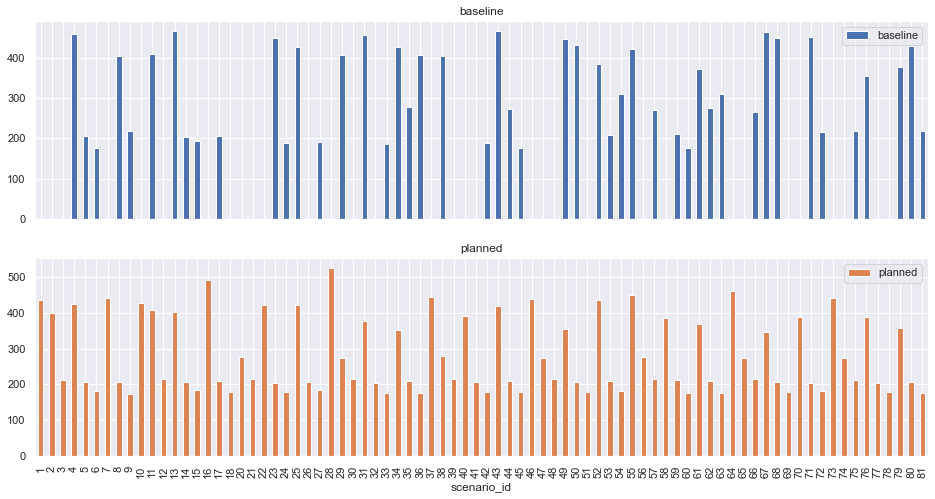

In [26]:
successes.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(subplots=True, legend=True, figsize=(16,8))

<AxesSubplot:xlabel='scenario_id', ylabel='ttc'>

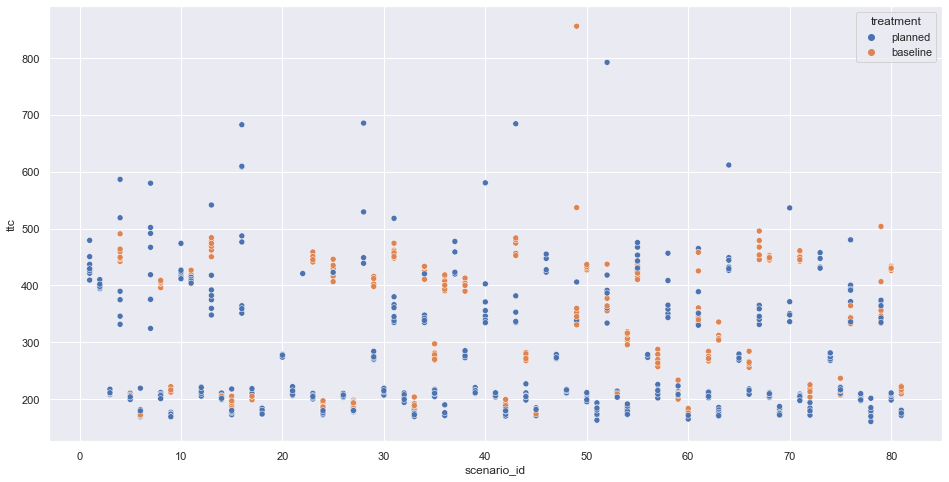

In [27]:
#successes.groupby(["scenario_id", "treatment"])["ttc"].mean().unstack().plot.bar(legend=True, figsize=(16,8))
sns.scatterplot(x="scenario_id", y="ttc", hue="treatment", data=successes)

# Adaptation Space

# Factors

In [28]:
trial_run_df.groupby(["factors_avg_speed", "treatment"])["end_state"].value_counts()

factors_avg_speed  treatment  end_state  
a                  baseline   success        354
                              no-skill       175
                              low-battery    100
                   planned    success        558
                              low-battery     35
Name: end_state, dtype: int64

In [29]:
trial_run_df.groupby(["factors_battery_charge", "treatment"])["end_state"].value_counts()

factors_battery_charge  treatment  end_state  
a                       baseline   success        109
                                   low-battery     64
                                   no-skill        38
                        planned    success        184
                                   low-battery     25
b                       baseline   success        117
                                   no-skill        68
                                   low-battery     24
                        planned    success        186
                                   low-battery      7
c                       baseline   success        128
                                   no-skill        69
                                   low-battery     12
                        planned    success        188
                                   low-battery      3
Name: end_state, dtype: int64

In [30]:
trial_run_df.groupby(["factors_battery_discharge_rate", "treatment"])["end_state"].value_counts()

factors_battery_discharge_rate  treatment  end_state  
a                               baseline   success        138
                                           no-skill        54
                                           low-battery     17
                                planned    success        195
                                           low-battery      5
b                               baseline   success        114
                                           low-battery     61
                                           no-skill        40
                                planned    success        194
                                           low-battery      5
c                               baseline   success        102
                                           no-skill        81
                                           low-battery     22
                                planned    success        169
                                           low-battery     25
Name: end_state

In [31]:
trial_run_df.groupby(["factors_skills", "treatment"])["end_state"].value_counts()

factors_skills  treatment  end_state  
a               baseline   no-skill       120
                           success         54
                           low-battery     34
                planned    success        181
                           low-battery     11
b               baseline   success        135
                           no-skill        55
                           low-battery     20
                planned    success        189
                           low-battery     14
c               baseline   success        165
                           low-battery     46
                planned    success        188
                           low-battery     10
Name: end_state, dtype: int64

In [32]:
trial_run_df.groupby(["factors_location", "treatment"])["end_state"].value_counts()

factors_location  treatment  end_state  
a                 baseline   success         90
                             low-battery     72
                             no-skill        45
                  planned    success        150
                             low-battery     30
b                 baseline   success        132
                             no-skill        69
                             low-battery     11
                  planned    success        204
                             low-battery      3
c                 baseline   success        132
                             no-skill        61
                             low-battery     17
                  planned    success        204
                             low-battery      2
Name: end_state, dtype: int64

## Time by factor

<AxesSubplot:xlabel='factors_battery_charge', ylabel='ttc'>

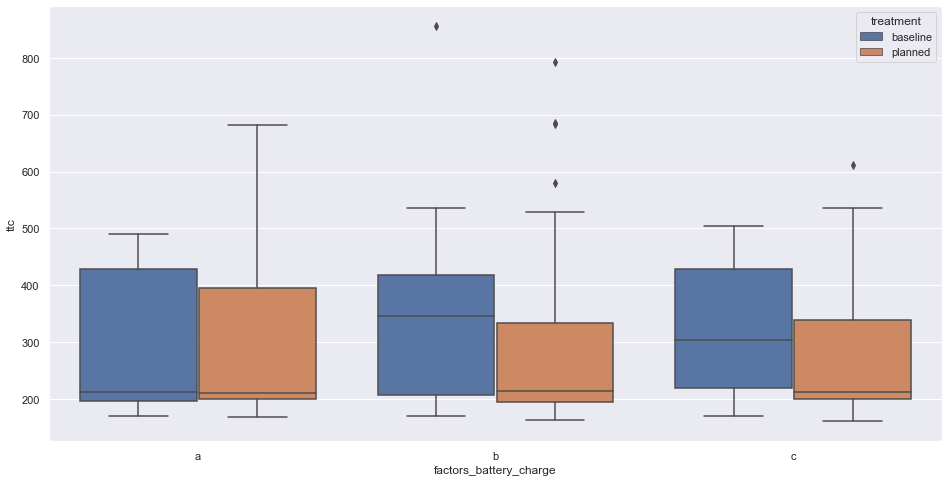

In [33]:
sns.boxplot(x="factors_battery_charge", y="ttc", hue="treatment", data=trial_run_df)

<AxesSubplot:xlabel='factors_battery_discharge_rate', ylabel='ttc'>

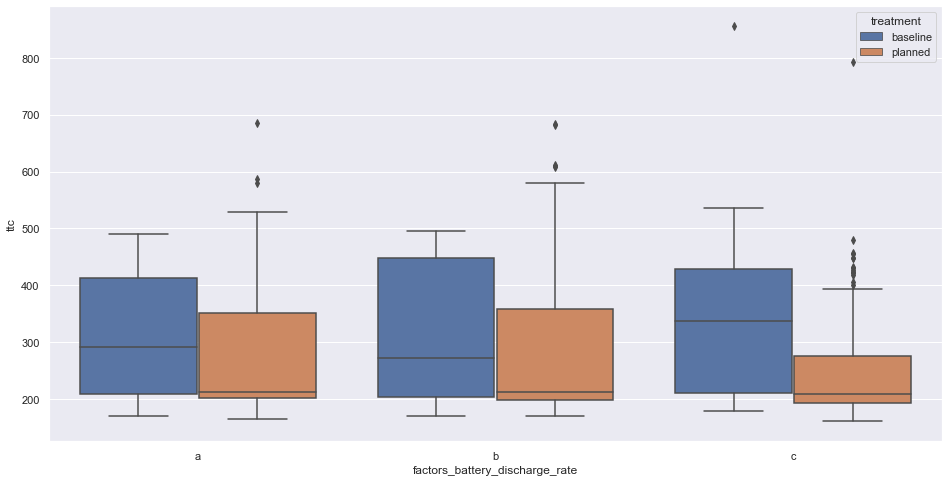

In [34]:
sns.boxplot(x="factors_battery_discharge_rate", y="ttc", hue="treatment", data=trial_run_df)

<AxesSubplot:xlabel='factors_skills', ylabel='ttc'>

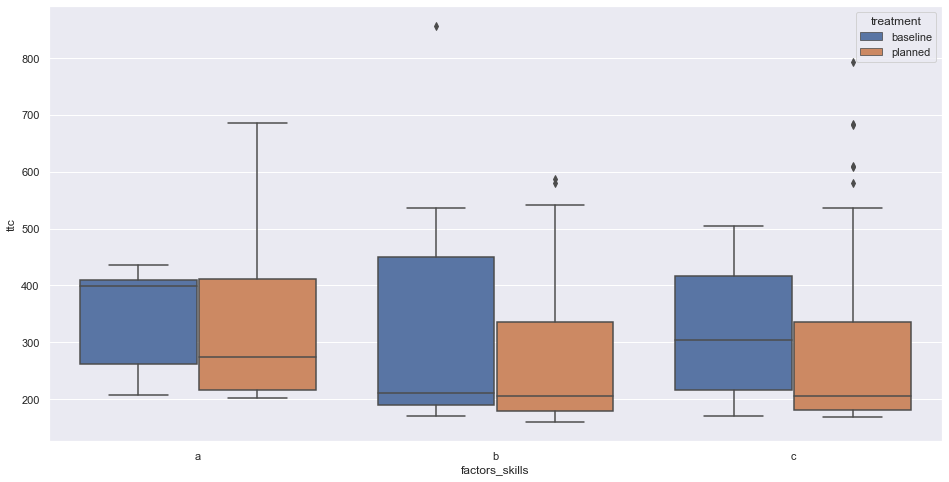

In [35]:
sns.boxplot(x="factors_skills", y="ttc", hue="treatment", data=trial_run_df)

<AxesSubplot:xlabel='factors_location', ylabel='ttc'>

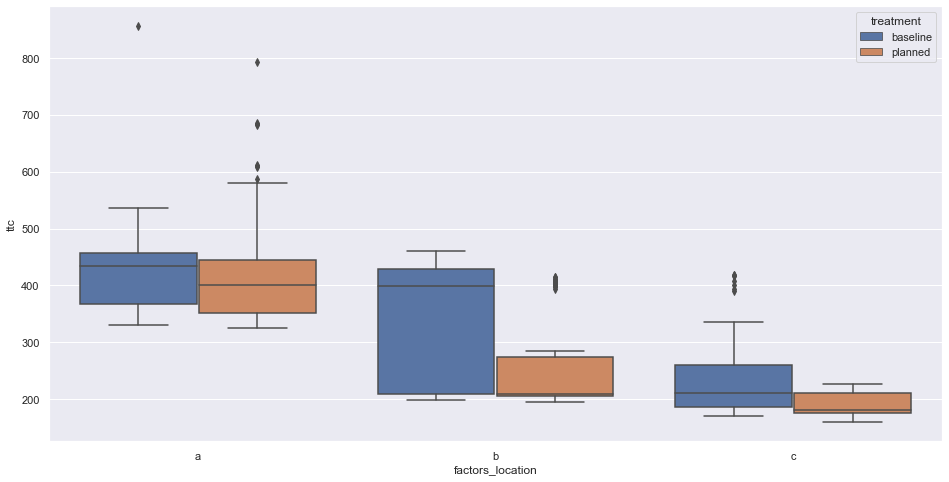

In [36]:
sns.boxplot(x="factors_location", y="ttc", hue="treatment", data=trial_run_df)

# Metrics
## Metric1 - Success

In [37]:
planned_suc = successes[successes.treatment == "planned"].groupby("scenario_id")["end_state"].count()
baseline_suc = successes[successes.treatment == "baseline"].groupby("scenario_id")["end_state"].count()

In [38]:
metric1 = sum(planned_suc)/sum(baseline_suc)
metric1

1.576271186440678

## Metric2 - TTC

In [39]:
planned_ttc = successes[successes.treatment == "planned"].groupby("scenario_id")["ttc"].mean()
baseline_ttc = successes[successes.treatment == "baseline"].groupby("scenario_id")["ttc"].mean()

In [40]:
metric2 = planned_ttc / baseline_ttc
metric2

scenario_id
1          NaN
2          NaN
3          NaN
4     0.927112
5     1.006694
        ...   
77         NaN
78         NaN
79    0.946462
80    0.481131
81    0.805439
Name: ttc, Length: 80, dtype: float64

<AxesSubplot:xlabel='scenario_id'>

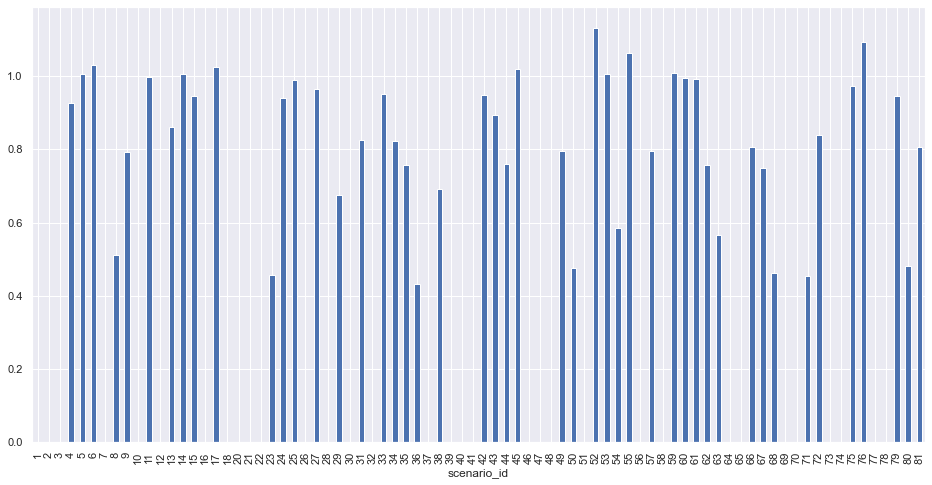

In [41]:
metric2.plot.bar(figsize=(16, 8))

In [42]:
metric2.mean()

0.8306930019644292

## Metric 3 - Battery

In [43]:
battery = trial_run_df[trial_run_df.end_state == "low-battery"]
battery.groupby("scenario_id")["end_state"].count()

scenario_id
1      7
4      2
7      8
9      1
10     8
12     8
13     1
15     1
16     8
18     8
19     8
22    15
25     7
26     7
32     1
37     8
40     9
43     4
47     2
49     1
50     1
51     1
52     4
55     2
62     1
64     1
65     1
67     1
70     8
77     1
Name: end_state, dtype: int64

In [44]:
planned_battery = battery[battery.treatment == "planned"].groupby("scenario_id")["end_state"].value_counts()
planned_battery

scenario_id  end_state  
4            low-battery    2
9            low-battery    1
19           low-battery    8
22           low-battery    7
25           low-battery    7
32           low-battery    1
40           low-battery    1
43           low-battery    2
49           low-battery    1
50           low-battery    1
51           low-battery    1
55           low-battery    1
64           low-battery    1
65           low-battery    1
Name: end_state, dtype: int64

In [45]:
baseline_battery = battery[battery.treatment == "baseline"].groupby("scenario_id")["end_state"].value_counts()
baseline_battery

scenario_id  end_state  
1            low-battery    7
7            low-battery    8
10           low-battery    8
12           low-battery    8
13           low-battery    1
15           low-battery    1
16           low-battery    8
18           low-battery    8
22           low-battery    8
26           low-battery    7
37           low-battery    8
40           low-battery    8
43           low-battery    2
47           low-battery    2
52           low-battery    4
55           low-battery    1
62           low-battery    1
67           low-battery    1
70           low-battery    8
77           low-battery    1
Name: end_state, dtype: int64

In [46]:
metric3 = sum(planned_battery) / sum(baseline_battery)
metric3

0.35

# Metric 4 Utility

In [47]:
suc_by_scenario_treatment = successes.groupby(["scenario_id", "treatment"])["end_state"].count().unstack()
metric4 = 0
for scen_id, scen_suc in suc_by_scenario_treatment.iterrows():
    if scen_suc.planned >= 1 and np.isnan(scen_suc.baseline):
        metric4 += 1
    elif metric2[scen_id] < 1:
        metric4 += 1
metric4

70

# T-test

In [48]:
stats.ttest_ind(successes[successes.treatment == "planned"]['ttc'], successes[successes.treatment == "baseline"]['ttc'])

Ttest_indResult(statistic=-6.773231273520563, pvalue=2.2579375138455955e-11)

In [49]:
stats.ttest_ind(counts[counts.treatment == "planned"]['end_state'], counts[counts.treatment == "baseline"]['end_state'])

Ttest_indResult(statistic=-2.3977225599090835, pvalue=0.017976567965261335)

## TTC Distribution

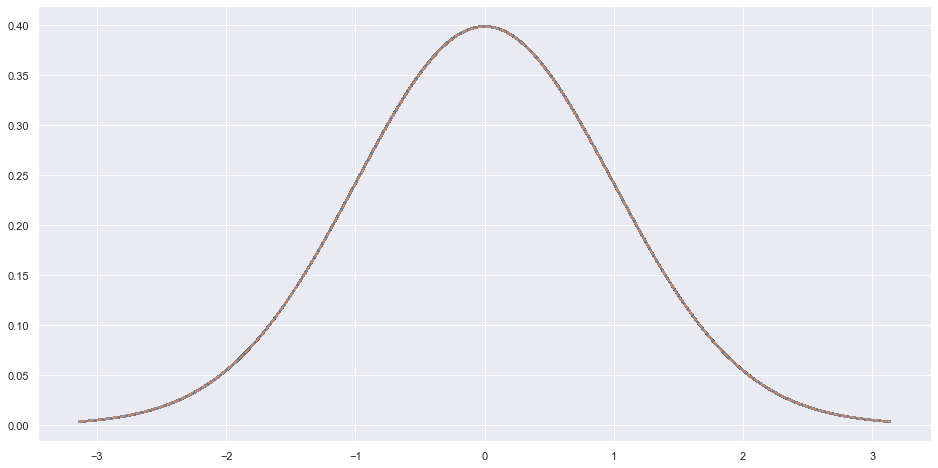

In [50]:
pdist = stats.t(successes[successes.treatment == "planned"]['ttc'])
bdist = stats.t(successes[successes.treatment == "baseline"]['ttc'])
x1 = np.linspace(pdist.ppf(0.001), pdist.ppf(0.999), 1000)
x2 = np.linspace(bdist.ppf(0.001), bdist.ppf(0.999), 1000)
plt.plot(x1, pdist.pdf(x1), '-')
plt.plot(x2, bdist.pdf(x2), '--')
pass

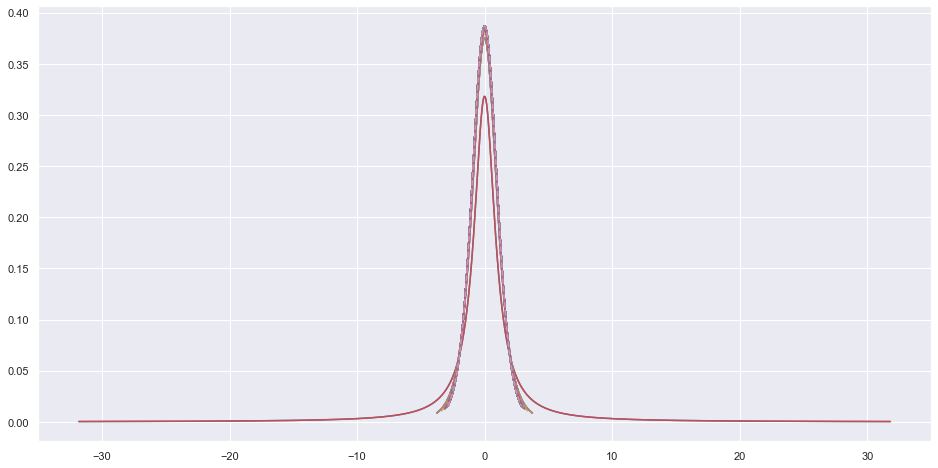

In [51]:
pdist = stats.t(counts[counts.treatment == "planned"]['end_state'])
bdist = stats.t(counts[counts.treatment == "baseline"]['end_state'])
x1 = np.linspace(pdist.ppf(0.01), pdist.ppf(0.99), 1000)
x2 = np.linspace(bdist.ppf(0.01), bdist.ppf(0.99), 1000)
plt.plot(x1, pdist.pdf(x1), '-')
plt.plot(x2, bdist.pdf(x2), '--')
pass